# CS6603 Final Project
### Author: Matthew Agard (magard3)

## Step 1

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
default_df = pd.read_csv('bank_loan_default.csv')
default_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
default_df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [4]:
default_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Step 2

In [5]:
def discretize_age(age):
    return int(age < 40)

def discretize_cred_score(score):
    return int(score >= 600)

In [6]:
default_df['Priv_Age'] = default_df['Age'].apply(discretize_age)
default_df['GoodCredit'] = default_df['CreditScore'].apply(discretize_cred_score)

default_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Priv_Age,GoodCredit
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,1
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


Exited  Priv_Age
0       0           2573
        1           5390
1       0           1440
        1            597
Name: Priv_Age, dtype: int64

----------------------------------------------


Exited  Gender
0       Female    3404
        Male      4559
1       Female    1139
        Male       898
Name: Gender, dtype: int64

----------------------------------------------


GoodCredit  Priv_Age
0           0           1212
            1           1822
1           0           2801
            1           4165
Name: Priv_Age, dtype: int64

----------------------------------------------


GoodCredit  Gender
0           Female    1366
            Male      1668
1           Female    3177
            Male      3789
Name: Gender, dtype: int64

----------------------------------------------


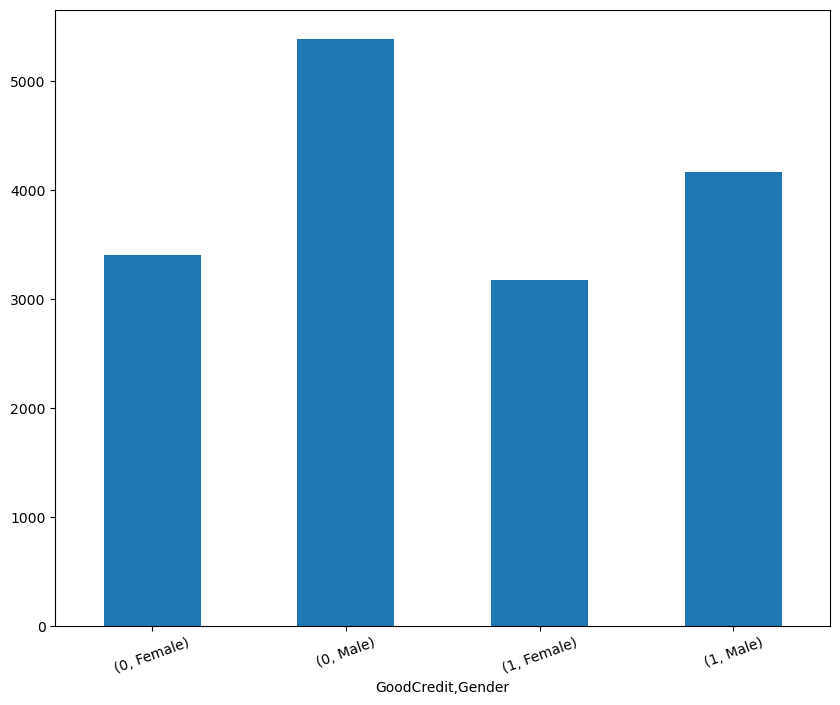

In [7]:
dep_vars = ['Exited', 'GoodCredit']
prot_vars = ['Priv_Age', 'Gender']

for y_var in dep_vars:
    for x_var in prot_vars:
        yx_pair = [y_var, x_var]
        yx_df = default_df.groupby(yx_pair)[x_var].count()
        
        display(yx_df)
        yx_df.plot(kind='bar', rot=20, figsize=(10, 8))
        plt.savefig(f'figures/{y_var}_{x_var}_hist.PNG'.lower(), dpi=300)
        print('----------------------------------------------')

## Step 3

#### Privileged Groups:
- Gender: Male (Priv_Gender = 1)
- Age: < 40 (Priv_Age = 1)
#### Unprivileged Groups:
- Gender: Female (Priv_Gender = 0)
- Age: >= 40 (Priv_Age = 0)

In [8]:
import numpy as np
from aif360.algorithms.preprocessing.reweighing import Reweighing
from aif360.datasets import StandardDataset
from aif360.sklearn.metrics import disparate_impact_ratio, statistical_parity_difference
from aif360.metrics import BinaryLabelDatasetMetric

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [9]:
prot_vars = ['Priv_Age', 'Priv_Gender']
chosen_dep_var = 'Exited'

### Dataset Transformation

In [10]:
def encode_gender(gender):
    return int(gender == 'Male')

def encode_geo(cntry):
    geo_dict = {'France': 1, 'Germany': 2, 'Spain': 3}
    return geo_dict[cntry] 

In [11]:
default_df['Priv_Gender'] = default_df['Gender'].apply(encode_gender)
default_df['Geography'] = default_df['Geography'].apply(encode_geo)

drop_cols = ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Gender']
default_df.drop(drop_cols, axis=1, inplace=True)

In [12]:
aif_df = StandardDataset(
    df=default_df, 
    label_name=chosen_dep_var,
    favorable_classes=[0],
    protected_attribute_names=prot_vars,
    privileged_classes=[[1], [1]]
)

priv_groups = [{'Priv_Gender': 1}, {'Priv_Age': 1}]
unpriv_groups = [{'Priv_Gender': 0}, {'Priv_Age': 0}]

In [13]:
rw = Reweighing(unprivileged_groups=unpriv_groups, privileged_groups=priv_groups)

transf_aif_data = rw.fit_transform(aif_df)
transf_aif_df = transf_aif_data.convert_to_dataframe()[0]

transf_aif_df

,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Priv_Age,GoodCredit,Priv_Gender,Exited
0,1.0,2.0,0.00,1.0,1.0,1.0,101348.88,0.0,1.0,0.0,1.0
1,3.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,0.0,0.0
2,1.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0.0,0.0,0.0,1.0
3,1.0,1.0,0.00,2.0,0.0,0.0,93826.63,1.0,1.0,0.0,0.0
4,3.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,5.0,0.00,2.0,1.0,0.0,96270.64,1.0,1.0,1.0,0.0
9996,1.0,10.0,57369.61,1.0,1.0,1.0,101699.77,1.0,0.0,1.0,0.0
9997,1.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0,1.0,0.0,1.0
9998,2.0,3.0,75075.31,2.0,1.0,0.0,92888.52,0.0,1.0,1.0,1.0


### Fairness Metric Computation
- Disparate Impact Ratio
- Statistical Parity Difference

#### Original Dataset - GoodCredit

In [14]:
for var in prot_vars:
    di_ratio = disparate_impact_ratio(
        y_true=default_df['GoodCredit'],
        prot_attr=default_df[var],
        priv_group=1
    )
    
    print(f'Disparate Impact - {var}: {di_ratio}')
    
print('-----------------------------------------------------------------------------')

for var in prot_vars:
    spd_ratio = statistical_parity_difference(
        y_true=default_df['GoodCredit'],
        prot_attr=default_df[var],
        priv_group=1
    )
    
    print(f'Statistical Parity Difference - {var}: {spd_ratio}')

Disparate Impact - Priv_Age: 1.0033170706608086
Disparate Impact - Priv_Gender: 1.0071724241779396
-----------------------------------------------------------------------------
Statistical Parity Difference - Priv_Age: 0.0023075996830245193
Statistical Parity Difference - Priv_Gender: 0.004980083417667869


#### Original Dataset - Exited (Default)

In [15]:
for var in prot_vars:
    di_ratio = disparate_impact_ratio(
        y_true=default_df['Exited'],
        prot_attr=default_df[var],
        priv_group=1
    )
    
    print(f'Disparate Impact - {var}: {di_ratio}')
    
print('-----------------------------------------------------------------------------')

for var in prot_vars:
    spd_ratio = statistical_parity_difference(
        y_true=default_df['Exited'],
        prot_attr=default_df[var],
        priv_group=1
    )
    
    print(f'Statistical Parity Difference - {var}: {spd_ratio}')

Disparate Impact - Priv_Age: 3.5985559494457084
Disparate Impact - Priv_Gender: 1.5235566404076464
-----------------------------------------------------------------------------
Statistical Parity Difference - Priv_Age: 0.25911773873711175
Statistical Parity Difference - Priv_Gender: 0.08615610465201876


#### Transformed Dataset - Exited (Default)

In [16]:
for var in prot_vars:
    attr = var
    # CODE CITATION: https://stackoverflow.com/questions/64506977/calculate-group-fairness-metrics-with-aif360
    idx = transf_aif_data.protected_attribute_names.index(attr)
    priv_groups =  [{attr:transf_aif_data.privileged_protected_attributes[idx][0]}] 
    unpriv_groups = [{attr:transf_aif_data.unprivileged_protected_attributes[idx][0]}]
    # CODE CITATION: https://stackoverflow.com/questions/64506977/calculate-group-fairness-metrics-with-aif360

    transf_aif_df_metrics = BinaryLabelDatasetMetric(
        dataset=transf_aif_data, 
        unprivileged_groups=unpriv_groups,
        privileged_groups=priv_groups
    )

    print(f'Disparate Impact - {var}: {transf_aif_df_metrics.disparate_impact()}')
    print(f'Statistical Parity Difference - {var}: {transf_aif_df_metrics.statistical_parity_difference()}')
    print('-----------------------------------------------------------------------------')

Disparate Impact - Priv_Age: 0.7719547821939845
Statistical Parity Difference - Priv_Age: -0.20178581654672134
-----------------------------------------------------------------------------
Disparate Impact - Priv_Gender: 0.9658271911948497
Statistical Parity Difference - Priv_Gender: -0.027914589110925925
-----------------------------------------------------------------------------


## Step 4 (Option A)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Split Datasets

In [18]:
def clean_aif_df(df):
    aif_df = df.convert_to_dataframe()
    aif_df[0].drop(chosen_dep_var, axis=1, inplace=True)
    
    return aif_df

In [19]:
default_X_train, default_X_test, default_y_train, default_y_test = train_test_split(
    default_df.drop(chosen_dep_var, axis=1), default_df[chosen_dep_var], test_size=0.2, random_state=42
)

In [20]:
aif_df_train, aif_df_test = transf_aif_data.split([0.8], shuffle=True)

aif_y_train, aif_y_test = aif_df_train.labels, aif_df_test.labels
aif_X_train, aif_X_test = clean_aif_df(aif_df_train), clean_aif_df(aif_df_test)

### Train Classifiers

In [21]:
dt_default = DecisionTreeClassifier()
dt_default.fit(default_X_train, default_y_train)

DecisionTreeClassifier()

In [22]:
dt_aif = DecisionTreeClassifier()
dt_aif.fit(aif_X_train[0], aif_y_train, sample_weight=aif_X_train[1]['instance_weights'])

DecisionTreeClassifier()

### Classifier Output

In [23]:
default_y_pred = dt_default.predict(default_X_test)

default_acc = accuracy_score(default_y_test, default_y_pred)
print(f'Accuracy - Original Dataset: {np.round(default_acc * 100, 2)}%')

Accuracy - Original Dataset: 77.55%


In [24]:
aif_y_pred = dt_aif.predict(aif_X_test[0])

aif_acc = accuracy_score(aif_y_test, aif_y_pred, sample_weight=aif_X_test[1]['instance_weights'])
print(f'Accuracy - Transformed Dataset: {np.round(aif_acc * 100, 2)}%')

Accuracy - Transformed Dataset: 77.52%


### Fairness Metric Computation
- Disparate Impact Ratio
- Statistical Parity Difference

In [25]:
chosen_prot_attr = 'Priv_Gender'

#### Original Test Dataset

In [26]:
di_ratio = disparate_impact_ratio(
    y_true=default_y_test,
    y_pred=default_y_pred,
    prot_attr=default_X_test[chosen_prot_attr],
    priv_group=1
)

spd_ratio = statistical_parity_difference(
    y_true=default_y_test,
    y_pred=default_y_pred,
    prot_attr=default_X_test[chosen_prot_attr],
    priv_group=1
)

print(f'Disparate Impact - {chosen_prot_attr}: {di_ratio}')
print(f'Statistical Parity Difference - {chosen_prot_attr}: {spd_ratio}')

Disparate Impact - Priv_Gender: 1.5940541962641408
Statistical Parity Difference - Priv_Gender: 0.10253538182093391


#### Transformed Test Dataset

In [27]:
di_ratio = disparate_impact_ratio(
    y_true=aif_y_test,
    y_pred=aif_y_pred,
    prot_attr=aif_X_test[0][chosen_prot_attr],
    priv_group=1,
    sample_weight=aif_X_test[1]['instance_weights']
)

spd_ratio = statistical_parity_difference(
    y_true=aif_y_test,
    y_pred=aif_y_pred,
    prot_attr=aif_X_test[0][chosen_prot_attr],
    priv_group=1,
    sample_weight=aif_X_test[1]['instance_weights']
)

print(f'Disparate Impact - {chosen_prot_attr}: {di_ratio}')
print(f'Statistical Parity Difference - {chosen_prot_attr}: {spd_ratio}')

Disparate Impact - Priv_Gender: 1.2830893232895948
Statistical Parity Difference - Priv_Gender: 0.0557490988391213
